In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


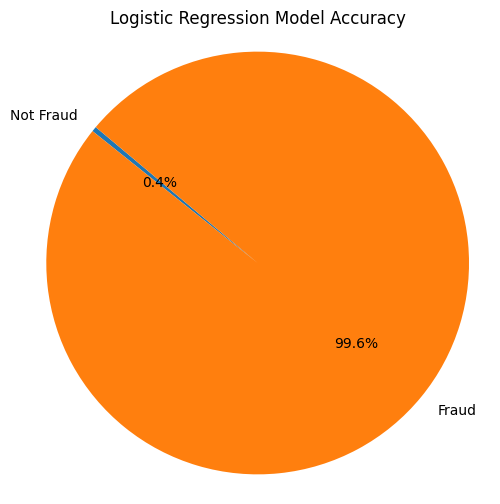

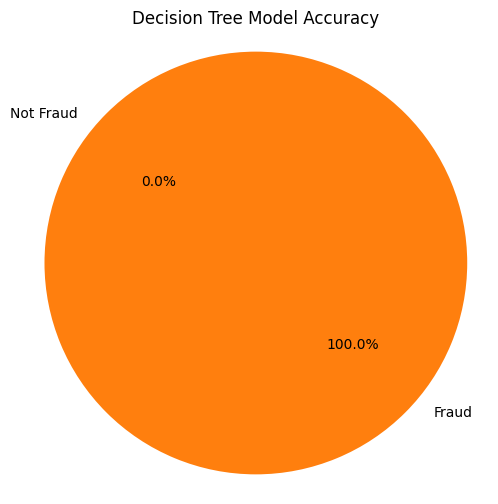

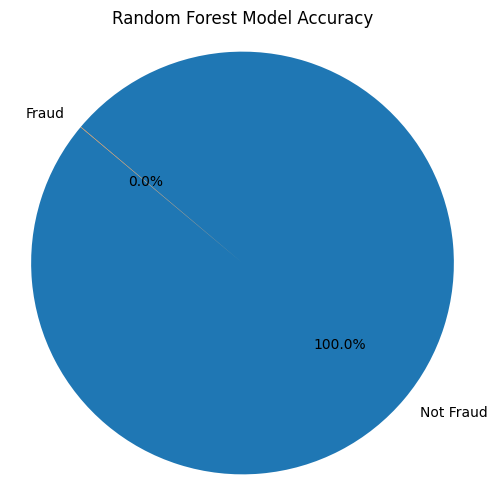

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/fraudTest[1].csv')
test_data = pd.read_csv('//content/drive/MyDrive/fraudTest[1].csv')

# Drop unnecessary columns
drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category',
                'first', 'last', 'gender', 'street', 'city', 'state', 'job',
                'dob', 'trans_num']
train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)

# Separate features and target
X_train = train_data.drop(['is_fraud'], axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop(['is_fraud'], axis=1)
y_test = test_data['is_fraud']

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)

# Random Forest
rand_forest = RandomForestClassifier(n_estimators=10)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)

# Plotting Pie Charts for Accuracy

# Labels for the two classes
labels = ['Not Fraud', 'Fraud']

# Accuracy values for each model
accuracy_values = [1 - accuracy_log_reg, accuracy_log_reg]

# Plotting Logistic Regression Model Accuracy
plt.figure(figsize=(6, 6))
plt.pie(accuracy_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Logistic Regression Model Accuracy')
plt.axis('equal')
plt.show()

# Accuracy values for Decision Tree model
accuracy_values = [1 - accuracy_dec_tree, accuracy_dec_tree]

# Plotting Decision Tree Model Accuracy
plt.figure(figsize=(6, 6))
plt.pie(accuracy_values, labels=labels, autopct='%1.1f%%', startangle=140) # Use accuracy_values instead of values
plt.title('Decision Tree Model Accuracy')
plt.axis('equal')
plt.show()

# Number of correct and incorrect predictions for Random Forest
num_correct = (y_test == y_pred_rand_forest).sum()
num_incorrect = (y_test != y_pred_rand_forest).sum()

# Plotting Random Forest Model Accuracy (Number of cases)
values = [num_correct, num_incorrect]
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Random Forest Model Accuracy')
plt.axis('equal')
plt.show()
